In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
from PIL import Image

In [2]:
#importing dataset
cat = [cv2.imread(file) for file in glob.glob('datasets/animals/cats/*')]
dog = [cv2.imread(file) for file in glob.glob('datasets/animals/dogs/*')]
panda = [cv2.imread(file) for file in glob.glob('datasets/animals/panda/*')]


In [3]:
#length and shape of images
print(cat[0].shape)
print(len(cat))
print(dog[0].shape)
print(len(dog))
print(panda[0].shape)
print(len(panda))

(374, 500, 3)
1000
(478, 382, 3)
1000
(500, 480, 3)
1000


In [4]:
#changing the image shapes to 32x32
dim = (32, 32)
#reducing pixels to 32 x 32 x 3
cat = [cv2.resize(file, dim, interpolation = cv2.INTER_AREA) for file in cat]
dog = [cv2.resize(file, dim, interpolation = cv2.INTER_AREA) for file in dog]
panda = [cv2.resize(file, dim, interpolation = cv2.INTER_AREA) for file in panda]

In [5]:
#length and shape of images
print(cat[0].shape)
print(len(cat))
print(dog[0].shape)
print(len(dog))
print(panda[0].shape)
print(len(panda))

(32, 32, 3)
1000
(32, 32, 3)
1000
(32, 32, 3)
1000


In [17]:
X = np.concatenate((np.array(cat), np.array(dog),np.array(panda)))
X = X.astype('float')/255.0

In [18]:
print(X[0].shape)
print(len(X))

(32, 32, 3)
3000


In [19]:
y_cat = np.zeros(len(cat)) # labels for cat
y_dog = np.ones(len(dog)) # labels for dog
y_panda = np.ones(len(panda))*2 # labels for panda
y = np.concatenate((y_cat,y_dog, y_panda)) # Labels

In [20]:
print(len(y))

3000


In [21]:
#importing ans splitting the data
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
#convert labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# Model

In [23]:
batch_size = 32
epochs = 100
opt = SGD(lr = 0.005)

In [24]:
def model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = (32,32, 3)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    return model

In [25]:
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 98307     
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 99,203
Trainable params: 99,203
Non-trainable params: 0
_________________________________________________________________


In [26]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size = batch_size, epochs = 100, verbose = 1)

Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 2s 812us/sample - loss: 1.0260 - acc: 0.4591 - val_loss: 1.0789 - val_acc: 0.4520
Epoch 2/100
2250/2250 [==============================] - 2s 983us/sample - loss: 0.9364 - acc: 0.5364 - val_loss: 0.8954 - val_acc: 0.5453
Epoch 3/100
2250/2250 [==============================] - 2s 905us/sample - loss: 0.8868 - acc: 0.5498 - val_loss: 0.8987 - val_acc: 0.5307
Epoch 4/100
2250/2250 [==============================] - 1s 609us/sample - loss: 0.8573 - acc: 0.5733 - val_loss: 0.9157 - val_acc: 0.5227
Epoch 5/100
2250/2250 [==============================] - 1s 589us/sample - loss: 0.8402 - acc: 0.5716 - val_loss: 0.9612 - val_acc: 0.4973
Epoch 6/100
2250/2250 [==============================] - 1s 552us/sample - loss: 0.8203 - acc: 0.5951 - val_loss: 0.9546 - val_acc: 0.4880
Epoch 7/100
2250/2250 [==============================] - 1s 590us/sample - loss: 0.8081 - acc: 0.6067 - val_loss: 0.855

In [27]:
#evaluating the network
predictions = model.predict(testX, batch_size = 32)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = ['cat', 'dog', 'panda']))

              precision    recall  f1-score   support

         cat       0.64      0.68      0.66       262
         dog       0.60      0.58      0.59       249
       panda       0.85      0.82      0.84       239

    accuracy                           0.69       750
   macro avg       0.70      0.69      0.69       750
weighted avg       0.69      0.69      0.69       750



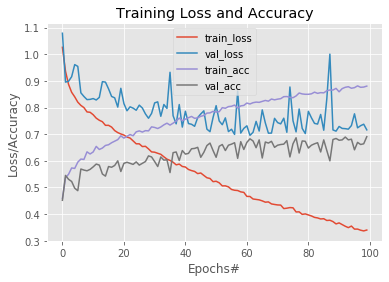

In [32]:
#plotting the training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 100), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 100), H.history['val_acc'], label = 'val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs#')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()